In [ ]:
import pandas as pd
import io
df=pd.read_csv('Superstore.csv', encoding= 'unicode_escape')


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.0 MB 135 kB/s
     |████████████████████████████████| 102 kB 5.2 MB/s 
     |████████████████████████████████| 690 kB 35.7 MB/s 
     |████████████████████████████████| 4.7 MB 59.8 MB/s 
     |████████████████████████████████| 62 kB 62 kB/s 
     |████████████████████████████████| 9.8 MB 25.2 MB/s 
     |████████████████████████████████| 296 kB 56.5 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.3.0-py2.py3-none-any.whl size=268032 sha256=706d88a4b3ac407305b4de1a453e0b2c2b0ce49c0679cf77ab2b557f50ff7de1
  Stored in directory: /tmp/pip-ephem-wheel-cache-mcgricif/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=81731440e05fa1098ffe02814104ce75101fa2bb1d58b0b5589de05d8fa817b1
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c

In [ ]:
from pandas_profiling import ProfileReport
profile =ProfileReport(df, title='Superstore', html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
statistics=df.describe().iloc[[1, 3, 7], :]
statistics

Sales   Quantity  Discount       Profit
mean    229.858001   3.789574  0.156203    28.656896
min       0.444000   1.000000  0.000000 -6599.978000
max   22638.480000  14.000000  0.800000  8399.976000

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
profitcat       0
dtype: int64

هیچ جای خالی نداریم

In [ ]:
df.duplicated().sum()

20

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Product Name    1850
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
 df['profitcat']=pd.cut(df['Profit'], bins=[-6600, -200, 0, 200, 8400], labels=['Huge Loss', 'Loss', 'Profit', 'Great Profit'])

[Text(0, 0.5, 'Profit Distribution')]

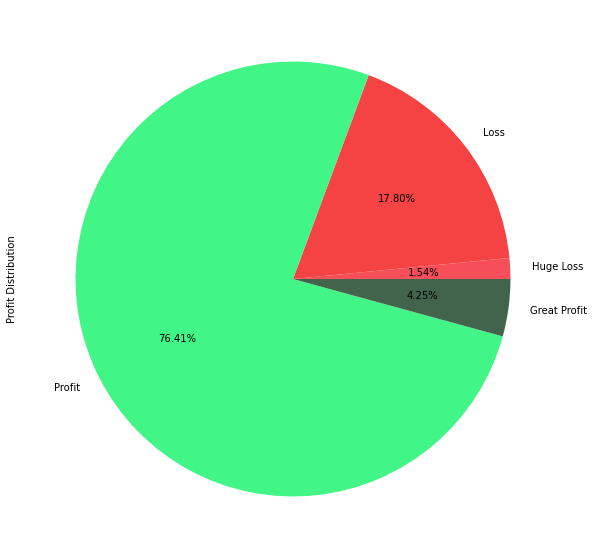

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
colors=['#f64f59', '#f54242', '#42f587', '#42634c']
df.groupby('profitcat').size().plot(kind='pie', autopct='%.2f%%', colors=colors, ax=ax)
ax.set(ylabel='Profit Distribution')


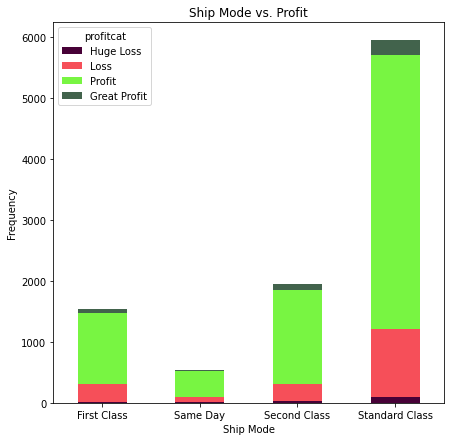

In [ ]:
pd.crosstab(df['Ship Mode'],df.profitcat).plot(kind="bar", stacked=True, figsize=(7,7), color=['#470137', '#f64f59', '#78f542', '#42634c'])
plt.title('Ship Mode vs. Profit')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
shipprofit=df.groupby('Ship Mode')['profitcat'].value_counts(normalize=True)*100
shipprofit

Ship Mode                   
First Class     Profit          76.091205
                Loss            18.566775
                Great Profit     4.169381
                Huge Loss        1.172638
Same Day        Profit          76.611418
                Loss            16.574586
                Great Profit     5.156538
                Huge Loss        1.657459
Second Class    Profit          79.218107
                Loss            14.557613
                Great Profit     4.629630
                Huge Loss        1.594650
Standard Class  Profit          75.550328
                Loss            18.769955
                Great Profit     4.066543
                Huge Loss        1.613174
Name: profitcat, dtype: float64

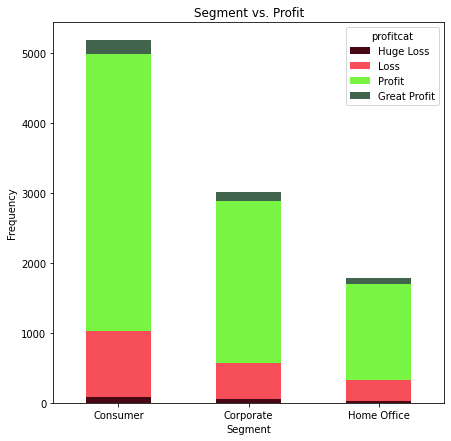

In [ ]:
pd.crosstab(df['Segment'],df.profitcat).plot(kind="bar", stacked=True, figsize=(7,7), color=['#470713', '#f64f59', '#78f542', '#42634c'])
plt.title('Segment vs. Profit')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
segmentprofit=df.groupby('Segment')['profitcat'].value_counts(normalize=True)*100
segmentprofit

Segment                  
Consumer     Profit          76.207030
             Loss            18.404789
             Great Profit     3.843183
             Huge Loss        1.544998
Corporate    Profit          76.451078
             Loss            17.280265
             Great Profit     4.577114
             Huge Loss        1.691542
Home Office  Profit          76.910112
             Loss            16.910112
             Great Profit     4.887640
             Huge Loss        1.292135
Name: profitcat, dtype: float64

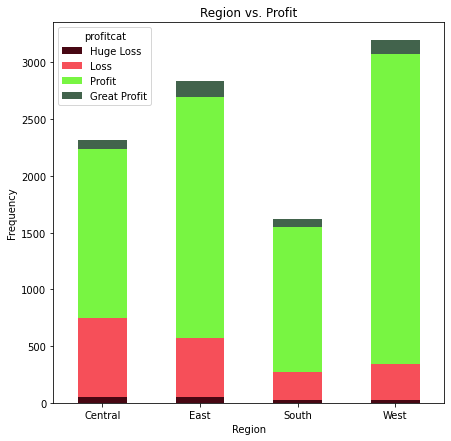

In [ ]:
pd.crosstab(df['Region'],df.profitcat).plot(kind="bar", stacked=True, figsize=(7,7), color=['#470713', '#f64f59', '#78f542', '#42634c'])
plt.title('Region vs. Profit')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
regionprofit=df.groupby('Region')['profitcat'].value_counts(normalize=True)*100
regionprofit

Region               
Central  Profit          64.079345
         Loss            30.142303
         Great Profit     3.622251
         Huge Loss        2.156102
East     Profit          74.788732
         Loss            18.239437
         Great Profit     5.176056
         Huge Loss        1.795775
South    Profit          78.765432
         Loss            15.185185
         Great Profit     4.444444
         Huge Loss        1.604938
West     Profit          85.597996
         Loss             9.768316
         Great Profit     3.788353
         Huge Loss        0.845335
Name: profitcat, dtype: float64

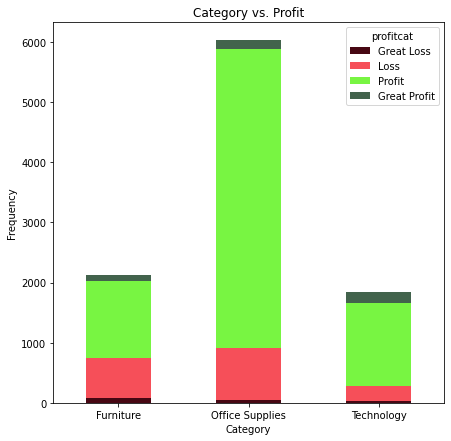

In [ ]:
pd.crosstab(df['Category'],df.profitcat).plot(kind="bar", stacked=True, figsize=(7,7), color=['#470713', '#f64f59', '#78f542', '#42634c'])
plt.title('Category vs. Profit')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
categoryprofit=df.groupby('Category')['profitcat'].value_counts(normalize=True)*100
categoryprofit

Category                     
Furniture        Profit          59.981079
                 Loss            31.551561
                 Great Profit     4.824976
                 Huge Loss        3.642384
Office Supplies  Profit          82.480053
                 Loss            14.361702
                 Great Profit     2.360372
                 Huge Loss        0.797872
Technology       Profit          75.420510
                 Loss            13.239284
                 Great Profit     9.766685
                 Huge Loss        1.573521
Name: profitcat, dtype: float64

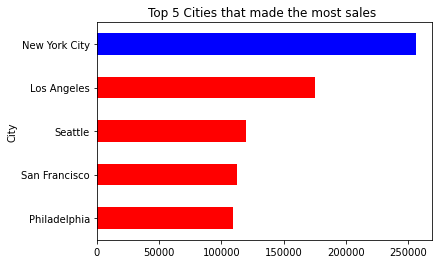

In [ ]:

df.groupby('City')['Sales'].sum().sort_values(ascending=False)[:5].plot(kind='barh', color=["blue", 'red', 'red', 'red', 'red'], title="Top 5 Cities that made the most sales ").invert_yaxis()


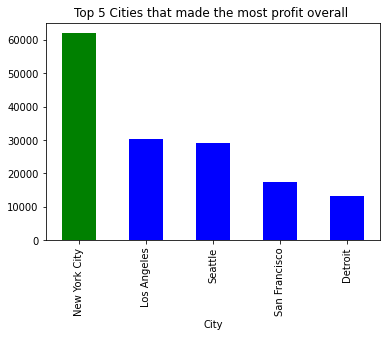

In [ ]:
df.groupby('City')['Profit'].sum().sort_values(ascending=False)[:5].plot(kind='bar', color=['Green', 'blue', 'blue', 'blue', 'blue'], title="Top 5 Cities that made the most profit overall ")

In [ ]:
def city_profit(category):
    category_1 = df[df['Category'] == category]
    category_1.groupby('City')['Profit'].sum().sort_values(ascending=False)[:5].plot(kind='bar', color=['Green', 'blue', 'blue', 'blue', 'blue'], title="Top 5 Cities that made the most profit in {}".format(category))

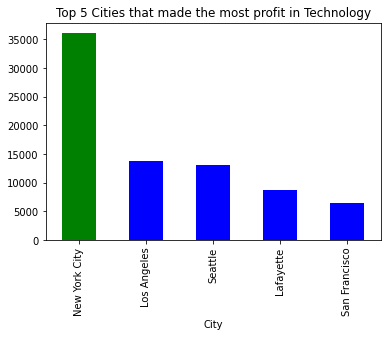

In [ ]:
city_profit('Technology')

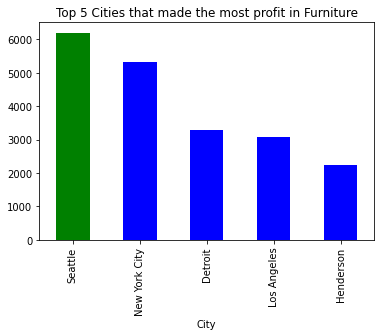

In [ ]:
city_profit('Furniture')

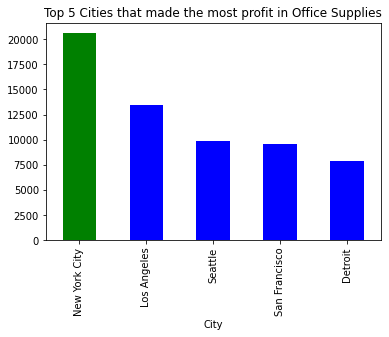

In [ ]:
city_profit('Office Supplies')

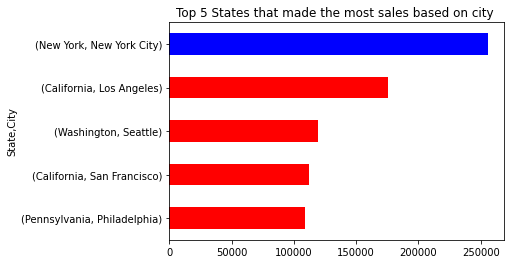

In [ ]:
df.groupby(['State', 'City'])['Sales'].sum().sort_values(ascending=False)[:5].plot(kind='barh', color=["blue", 'red', 'red', 'red', 'red'], title="Top 5 States that made the most sales based on city ").invert_yaxis()


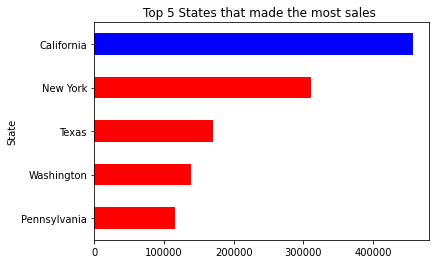

In [ ]:
df.groupby('State')['Sales'].sum().sort_values(ascending=False)[:5].plot(kind='barh', color=["blue", 'red', 'red', 'red', 'red'], title="Top 5 States that made the most sales ").invert_yaxis()


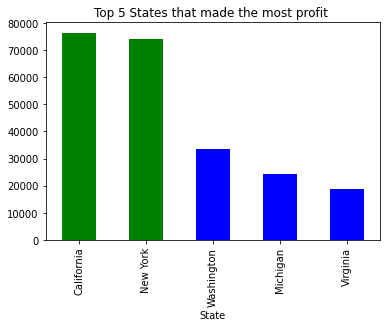

In [ ]:
df.groupby('State')['Profit'].sum().sort_values(ascending=False)[:5].plot(kind='bar', color=['Green', 'green', 'blue', 'blue', 'blue'], title="Top 5 States that made the most profit ")


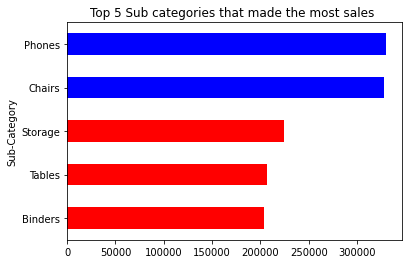

In [ ]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)[:5].plot(kind='barh', color=["blue", 'blue', 'red', 'red', 'red'], title="Top 5 Sub categories that made the most sales ").invert_yaxis()


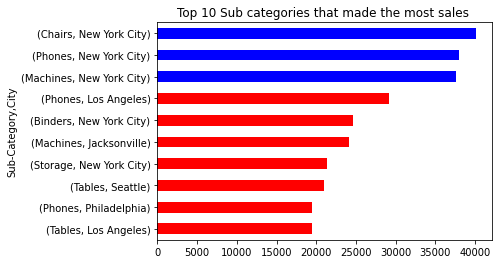

In [ ]:
df.groupby(['Sub-Category', 'City'])['Sales'].sum().sort_values(ascending=False)[:10].plot(kind='barh', color=["blue", 'blue', 'blue', 'red', 'red', "red", 'red', 'red', 'red', 'red'], title="Top 10 Sub categories that made the most sales ").invert_yaxis()


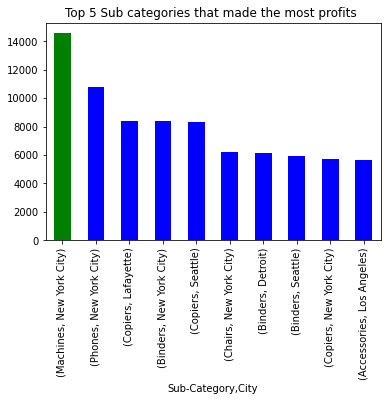

In [ ]:
df.groupby(['Sub-Category', 'City'])['Profit'].sum().sort_values(ascending=False)[:10].plot(kind='bar', color=['Green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'], title="Top 5 Sub categories that made the most profits ")


In [ ]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 6.2 MB/s 
     |████████████████████████████████| 357 kB 47.6 MB/s 
     |████████████████████████████████| 1.6 MB 53.5 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=11fa87c72c3dd1c44fd8de4ac6333d0f6c72d53f923723b45188e3626f96b674
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df22=df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)[:10]#.plot(kind='bar', color=['Green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'], title="Top 5 Sub categories that made the most profits ")
fig = px.bar(df22)
fig.update_traces(marker_color=['Green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
fig.update_layout(width=700, height=500, bargap=0.05, title_font_color="red", xaxis_title="Sub_categories", yaxis_title='Profit',   title={
        'text': "Top 10 Sub categories that made the most profits",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, showlegend=False)
fig.show()

In [ ]:
fig = px.treemap(df, 
    path = [px.Constant('America'), 'Category', 'Sub-Category'], 
    values = 'Sales',
    color = 'Profit' ,
    color_continuous_midpoint=np.average(df['Profit'], weights=df['Sales']),
    color_continuous_scale = 'RdBu',
    width = 800,
    height = 600)
fig.show()

In [ ]:
import numpy as np
fig = px.treemap(df, 
    path = [px.Constant('America'), 'State', 'City'], 
    values = 'Sales',
    color = 'Quantity' ,
    color_continuous_midpoint=np.average(df['Quantity'], weights=df['Sales']),
    color_continuous_scale = 'RdBu',
    width = 800,
    height = 600)
fig.show()

**Outlier detection**

1- If we have Gaussian Distribution

In [ ]:
dfn=df.select_dtypes(include=['int64', 'float64'].copy())

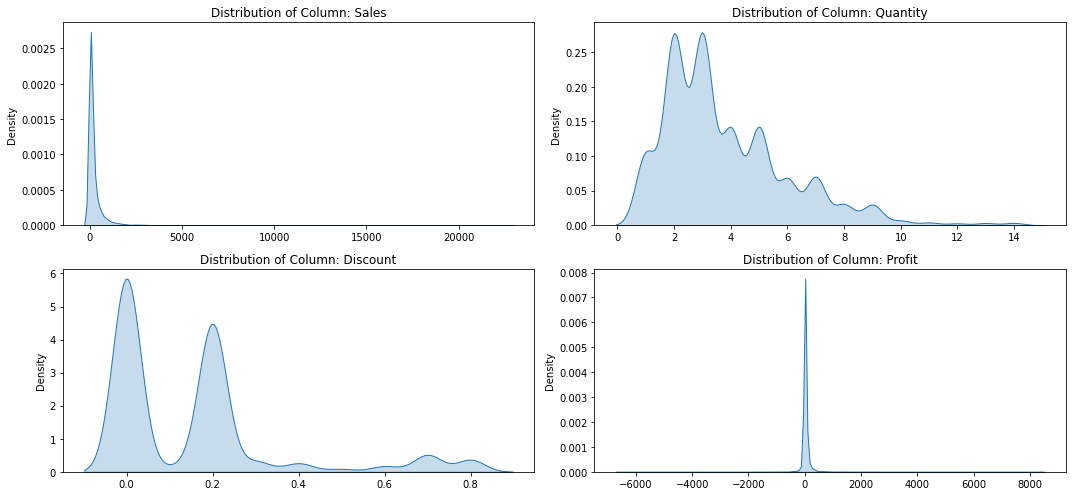

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = dfn.columns  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = dfn # select the data
    sns.kdeplot(data=data, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Column: {col}', xlabel=None)
    
 # delete the empty subplot
fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
from numpy import mean
from numpy import std


Using Std outlier removal for all columns 

In [ ]:
def stdoutlier (dfn, column_name, multiple):
  X=dfn[column_name].mean()
  Y=dfn[column_name].std()
  cut_off=Y*multiple
  lower, upper=X-cut_off, X+cut_off
  return lower, upper
columns=dfn.columns
column_bounds={}
dfnoutlier=pd.DataFrame()
for column_name in columns:
  lower, upper=stdoutlier(dfn, column_name, 3)
  column_bounds[column_name] = [lower, upper]
  dfnoutlier=dfnoutlier.append(dfn[(dfn[column_name]<column_bounds[column_name][0]) | (dfn[column_name]>column_bounds[column_name][1])])
 
print('Identified Outliers: %d' % len(dfnoutlier))
dfnoutlierremoved=pd.DataFrame()
dfnoutlierremoved=dfn[~((dfn['Profit'].isin(dfnoutlier['Profit']))&(dfn['Sales'].isin(dfnoutlier['Sales']))&(dfn['Discount'].isin(dfnoutlier['Discount']))&(dfn['Quantity'].isin(dfnoutlier['Quantity'])))].reset_index(drop=False)
print('outlier removed rows: %d' % len(dfnoutlierremoved))

Identified Outliers: 645
outlier removed rows: 9417


applying Std outlier removal just for profit column (gaussian)

In [ ]:
m=dfn['Profit'].mean()
n=dfn['Profit'].std()
cut_of=n*3
lower1, upper1=m-cut_of, m+cut_of
dfnprofitoutlier=dfn[(dfn['Profit']<lower1) | (dfn['Profit']>upper1)]
print('Identified Outliers in profit: %d' % len(dfnprofitoutlier)) 
dfnprofitoutlierremoved=dfn[(dfn['Profit']>=lower1) & (dfn['Profit']<=upper1)]      
print(' Profit without outlier: %d' % len(dfnprofitoutlierremoved))    
dfnprofitoutlierremoved.duplicated().sum()         

Identified Outliers in profit: 107
 Profit without outlier: 9867


2282

2- IQR method

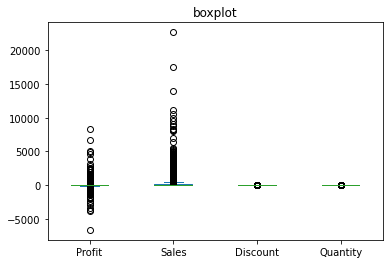

In [ ]:
import matplotlib.pyplot as plt
ax = df[['Profit', 'Sales', 'Discount', 'Quantity']].plot(kind='box', title='boxplot')


plt.show()

In [ ]:
import plotly.express as px

fig = px.box(df, x='Region', y="Profit")
fig.show()

In [ ]:
def iqr (df, column_name, multiple):
  lower_quantile = df[column_name].quantile(0.25)
  upper_quantile = df[column_name].quantile(0.75)
  IQR = upper_quantile - lower_quantile
  lower_bound = lower_quantile - multiple * IQR
  upper_bound = upper_quantile + multiple * IQR
  return lower_bound, upper_bound
columns=dfn.columns
column_bounds={}
dfniqroutlier=pd.DataFrame()
for column_name in columns:
  lower_bound, upper_bound=iqr(df, column_name, 1.5)
  column_bounds[column_name] = [lower_bound, upper_bound]
  dfniqroutlier=dfniqroutlier.append(df[(df[column_name]<column_bounds[column_name][0]) | (df[column_name]>column_bounds[column_name][1])
print('Identified Outliers: %d' % len(dfniqroutlier))

Identified Outliers: 4071


Applying IQR to columns separately

In [ ]:
#Sales
lower_bound, upper_bound=iqr(df, 'Sales', 1.5)
column_boundss={}
column_boundss[column_name] = [lower_bound, upper_bound]
dfniqrsale=df[(df['Sales']<column_bounds['Sales'][0]) | (df['Sales']>column_bounds['Sales'][1])]
print('Identified Outliers in Sales: %d' % len(dfniqrsale))
#Profit
lower_bound, upper_bound=iqr(df, 'Profit', 1.5)
column_boundss={}
column_boundss[column_name] = [lower_bound, upper_bound]
dfniqrprofit=df[(df['Profit']<column_bounds['Profit'][0]) | (df['Profit']>column_bounds['Profit'][1])]
print('Identified Outliers in Profit: %d' % len(dfniqrprofit))

lower_bound, upper_bound=iqr(df, 'Discount', 1.5)
column_boundss={}
column_boundss[column_name] = [lower_bound, upper_bound]
dfniqrdiscount=df[(df['Discount']<column_bounds['Discount'][0]) | (df['Discount']>column_bounds['Discount'][1])]
print('Identified Outliers in Discount: %d' % len(dfniqrdiscount))

lower_bound, upper_bound=iqr(df, 'Quantity', 1.5)
column_boundss={}
column_boundss[column_name] = [lower_bound, upper_bound]
dfniqrquantity=df[(df['Quantity']<column_bounds['Quantity'][0]) | (df['Quantity']>column_bounds['Quantity'][1])]
print('Identified Outliers in Quantity: %d' % len(dfniqrquantity))


Identified Outliers in Sales: 1167
Identified Outliers in Profit: 1880
Identified Outliers in Discount: 854
Identified Outliers in Quantity: 170


3- Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 'auto')
preds = isf.fit_predict(df[["Profit", "Sales", "Discount", "Quantity"]])

df["iso_forest_outliers"] = preds
df["iso_forest_outliers"] = df["iso_forest_outliers"].astype(str)

df["iso_forest_scores"] = isf.decision_function(df[["Profit", "Sales", "Discount", "Quantity"]])

print(df["iso_forest_outliers"].value_counts())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1     8324
-1    1650
Name: iso_forest_outliers, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig=px.scatter_3d(df, x='Profit', y='Sales', z='Quantity', color='iso_forest_outliers')
fig.show()

In [ ]:
def scatter_plot(dataframe, x, y, color, title):
  fig = px.scatter(dataframe, x = x, y=y,
                    color = color)
                 
  fig.update_layout(title = title,
                     title_x = 0.5)
  fig.show()
scatter_plot(df, "Profit", "Sales", "iso_forest_outliers", title="Profit vs. Sales outliers")
scatter_plot(df, "Profit", "Quantity", "iso_forest_outliers", title="Profit vs. Quantity outliers")
scatter_plot(df, "Profit", "Discount", "iso_forest_outliers", title="Profit vs. Discount outliers")
#scatter_plot(df, "Profit", "Sales", "iso_forest_outliers", title="Profit vs. Sales outliers")


**4- Local Outlier Factor**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=20)
pred = clf.fit_predict(df[["Profit", "Sales", "Discount", "Quantity"]])
df["LOF"] = pred
df["LOF"]=df["LOF"].astype(str)

print(df["LOF"].value_counts())


1     9641
-1     333
Name: LOF, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig=px.scatter_3d(df, x='Profit', y='Sales', z='Quantity', color='LOF')
fig.show()

**5- one class SVM**

In [ ]:
! pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.svm import OneClassSVM
kl=OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
p=kl.fit(df[["Profit", "Sales", "Discount", "Quantity"]])
predict=p.predict(df[["Profit", "Sales", "Discount", "Quantity"]])
df["SVM"]=predict
df["SVM"]=df["SVM"].astype(str)
print(df["SVM"].value_counts())



1     7866
-1    2108
Name: SVM, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig=px.scatter_3d(df, x='Profit', y='Sales', z='Quantity', color='SVM')
fig.show()

**6- DBScan**

In [ ]:
! pip install collections

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [ ]:
 from sklearn.cluster import DBSCAN
 import collections
 from sklearn.preprocessing import StandardScaler
 from collections import Counter

In [ ]:
datadb=df[["Profit", "Sales", "Discount", "Quantity"]]
datadb=datadb.values.astype('float', copy=False)
datadb_scaler=StandardScaler().fit(datadb)
datadb=datadb_scaler.transform(datadb)
datadb
model=DBSCAN(eps=0.25, min_samples=12, metric='euclidean').fit(datadb)
model


DBSCAN(eps=0.25, min_samples=12)

In [ ]:
outlier_db=df[model.labels_== -1]
cluster_db=df[model.labels_!=-1]
colors=model.labels_
color_cluster=colors[colors!=-1]
color_outliers='black'
clusters=Counter(model.labels_)
print(clusters)

print('Number of clusters={}'.format(len(clusters)-1))

Counter({-1: 1231, 1: 1108, 0: 1102, 2: 920, 5: 917, 6: 554, 4: 540, 16: 429, 8: 403, 24: 363, 17: 330, 15: 226, 3: 225, 20: 178, 11: 171, 25: 104, 26: 89, 10: 88, 22: 79, 23: 68, 9: 61, 13: 61, 7: 59, 30: 58, 28: 45, 34: 45, 14: 44, 32: 44, 18: 38, 35: 34, 39: 34, 21: 33, 31: 31, 29: 29, 46: 27, 27: 26, 12: 21, 42: 19, 19: 18, 43: 17, 38: 16, 47: 16, 36: 15, 40: 15, 41: 14, 44: 13, 33: 12, 37: 12, 45: 12})
Number of clusters=48


**7-Z-score**

**8- Elliptic Envelope**

**9- KNN**

**10- RCF**